In [1]:
#install.packages("BiocManager")
#install.packages("matrixStats")
#Installs TCGAbiolinks if not already present
if (!require(TCGAbiolinks)) BiocManager::install("TCGAbiolinks")

#What line of code needs to be added before using TCGAbiolinks?
library(TCGAbiolinks)
#add barcodes argument to query if you want to run on your local machine for smaller files downloaded
barcodes_rnaseq <- c("TCGA-BH-A0DG-01A-21R-A12P-07","TCGA-A2-A0YF-01A-21R-A109-07",
          "TCGA-AN-A04A-01A-21R-A034-07","TCGA-AR-A1AP-01A-11R-A12P-07",
              "TCGA-A2-A0T3-01A-21R-A115-07", "TCGA-E2-A154-01A-11R-A115-07" )
#barcodes_clinic <- c("TCGA-BH-A0DG","TCGA-A2-A0YF","TCGA-AN-A04A","TCGA-AR-A1AP", "TCGA-A2-A0T3",
                      #"TCGA-E2-A154", "TCGA-AO-A12F", "TCGA-A2-A0YM", "TCGA-BH-A0E0", "TCGA-AN-A0FL")


Loading required package: TCGAbiolinks



In [2]:
print("here")
#######    Group 1: RNASeq     ############
 library(SummarizedExperiment)
 query <- GDCquery(project = "TCGA-BRCA",
                   data.category = "Transcriptome Profiling",
                   data.type = "Gene Expression Quantification",
                   workflow.type = "HTSeq - Counts",
                   barcode = barcodes_rnaseq)
 GDCdownload(query) #only need this line of code once to download the data
 sum_exp <- GDCprepare(query)

[1] "here"


Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

|====================================================|100%                      Completed after 1 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

brca subtype information from:doi.org/10.1016/j.ccell.2018.03.014

From the 60483 genes we couldn't map 3881



In [4]:

# Create a tutorial on SummarizedExperiment

#sum_exp
patient_data <- colData(sum_exp)
patient_ages <- patient_data$paper_age_at_initial_pathologic_diagnosis
patient_data$age_category = ifelse(patient_ages < 40, "Young", ifelse(patient_ages >= 60, "Old", "Mid"))

#colnames(colData(sum_exp))

# Boxplots by age
# Add a new column to colData called "age_category"
# If age_at_initial_pathologic_diagnosis is < 40, define patient as "Young" in new column
# If age_at_initial_pathologic_diagnosis is >= 60, define patient as "Old" in new column
# Other patients (between 40 and 60), define as "Mid"
# Choose 3 genes of interest from the paper presentations
# Create 3 different boxplots with age_category on x-axis, counts on the y-axis by repeating the below code for each ge$# remember to give your plot a title and informative axis labels
# png("boxplot_one.png")
# boxplot(sum_exp)
# *Feel free to add lines here that format your boxplot*
# dev.off()
# Use rsync to copy your create pngfile to local machine for viewing

In [5]:
htseq_counts <- assays(sum_exp)$"HTSeq - Counts"

In [6]:
patient_data$TP53_counts = htseq_counts["ENSG00000141510",]
patient_data$ERBB2_counts = htseq_counts["ENSG00000141736",]
patient_data$PIK3CA_counts = htseq_counts["ENSG00000121879",]

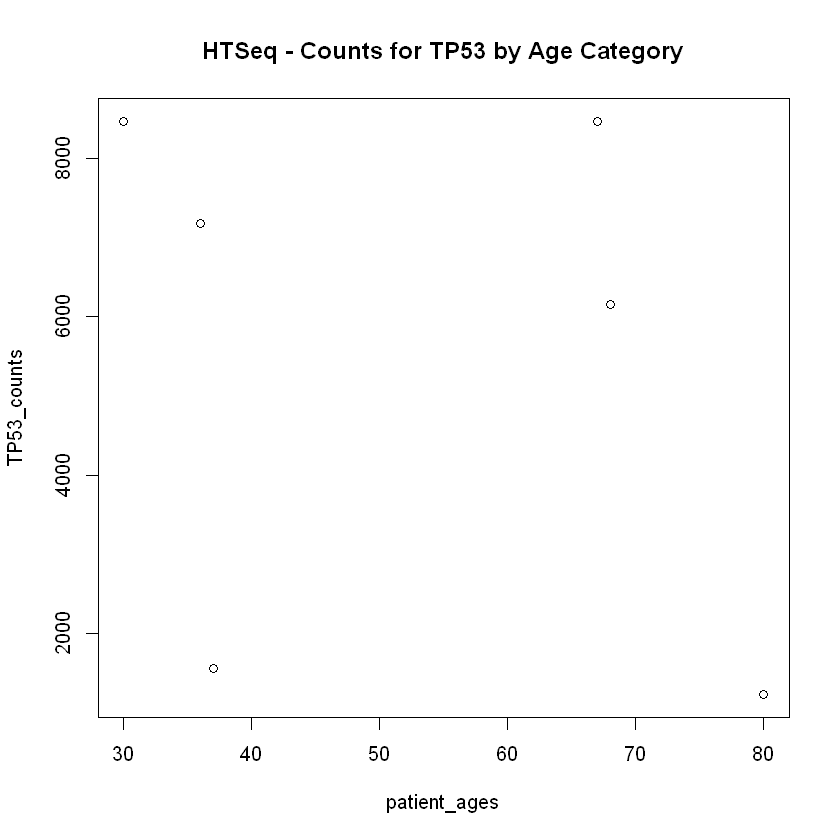

In [22]:
#patient_data
#TP53_counts~patient_ages
plot(TP53_counts~patient_ages, data = patient_data, main = "HTSeq - Counts for TP53 by Age Category")


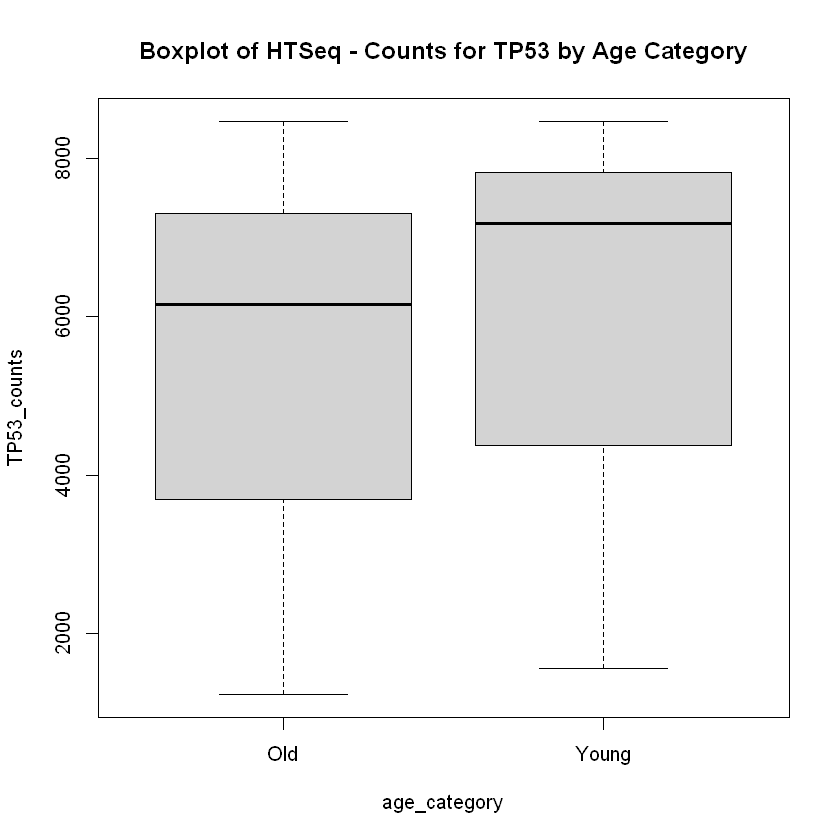

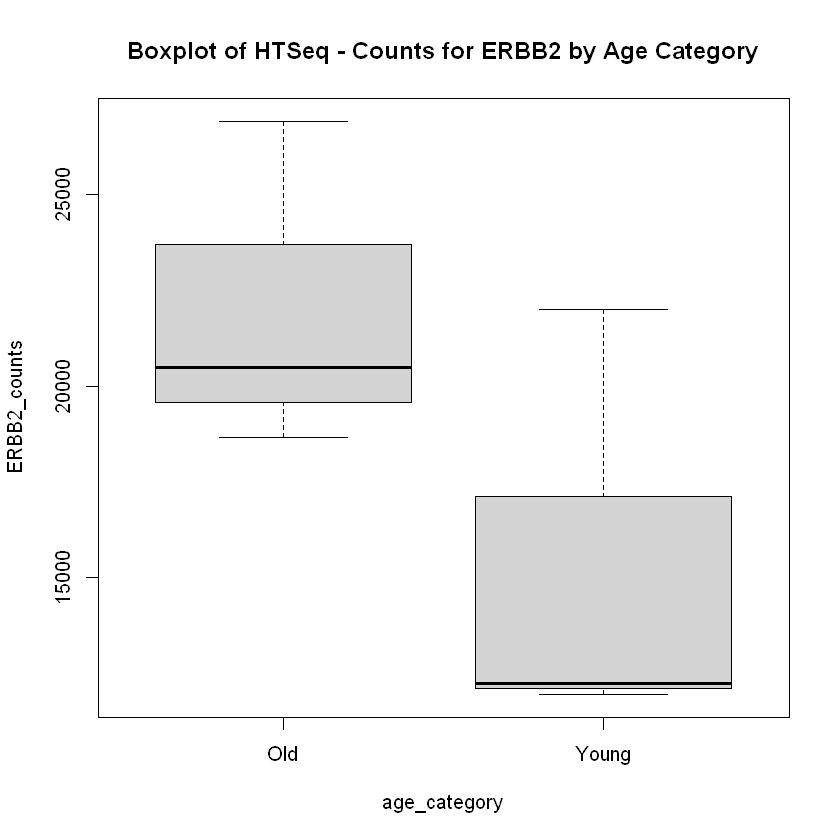

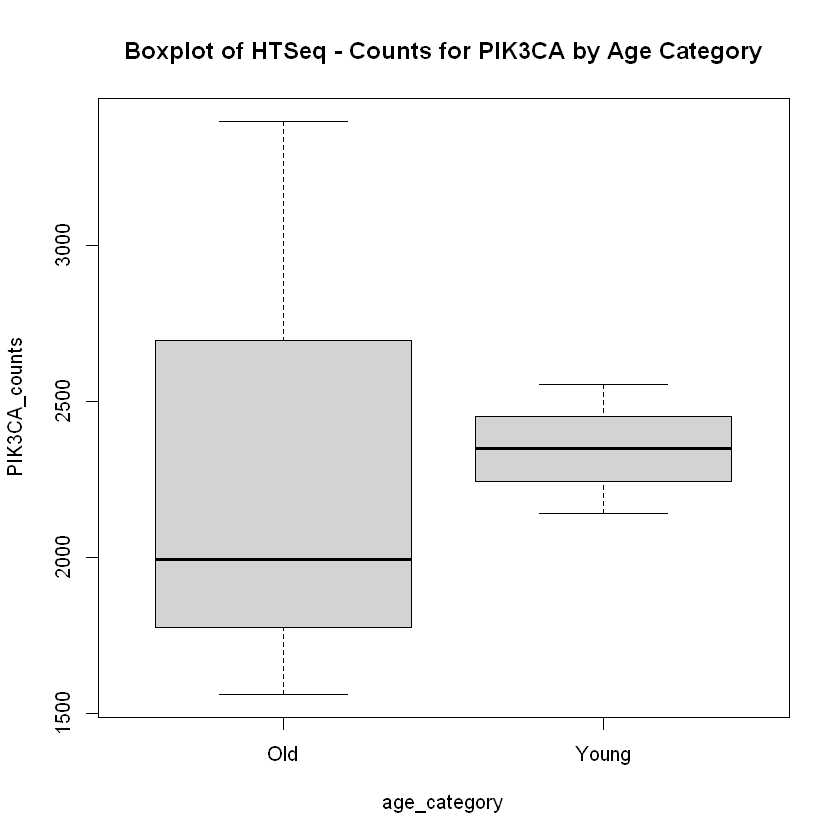

In [10]:
boxplot(TP53_counts~age_category, data = patient_data, main = "Boxplot of HTSeq - Counts for TP53 by Age Category")
boxplot(ERBB2_counts~age_category, data = patient_data, main = "Boxplot of HTSeq - Counts for ERBB2 by Age Category")
boxplot(PIK3CA_counts~age_category, data = patient_data, main = "Boxplot of HTSeq - Counts for PIK3CA by Age Category")